In [1]:
from __future__ import division
import sys
import os
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
from concurrent.futures import ProcessPoolExecutor, wait
from scipy import optimize as sco
from glob import glob
import re
from matplotlib.colors import LogNorm

In [2]:
nb_dir = '/home/dup193/work/double_pulse/stat_analysis'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from likelihood import BinnedPoissonLikelihood
from event_selection import EventSelection, MakeDataFrames
from helper_functions import build_histograms, build_error_histograms, plot_histogram, get_default_binning,\
build_uncert_histograms,plot_histogram_ratio
from stats import sample_from_hist,ts_to_pval
from signal_injector import SignalInjector
from scan_neyman_plane import scan_neyman_plane
from limit_calculator import LimitCalculator

In [17]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_1_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_1_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_1_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_3_1.npy',mmap_mode='r')
data_n0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuALL_2_1.npy',mmap_mode='r')
data_ac0 = np.load('/fastio2/dasha/double_pulse/data_AtmosConv.npy',mmap_mode='r')
data_ap0 = np.load('/fastio2/dasha/double_pulse/data_AtmosPrompt.npy',mmap_mode='r')
data_g0 = np.load('/fastio2/dasha/double_pulse/data_MuonGun_all.npy', mmap_mode='r')
#data_c0 = np.load('/fastio2/dasha/double_pulse/data_ALL_CC_CNN_corsika.npy',mmap_mode='r')
dataframe_path = '/home/dup193/work/double_pulse/max_test/dataframes/fr1/'
out_path ="/home/dup193/work/double_pulse/max_test/munormm/ts_dist_merge_test/"

In [260]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuE_3_1.npy',mmap_mode='r')
dataframe_path = '/home/dup193/work/double_pulse/max_test/dataframes/de117/'
out_path ="/home/dup193/work/double_pulse/max_test/de117/ts_dist/"

In [422]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuE_3_1.npy',mmap_mode='r')
ataframe_path = '/home/dup193/work/double_pulse/max_test/dataframes/de081/'
out_path ="/home/dup193/work/double_pulse/max_test/de081/ts_dist/"

In [431]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs7_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuE_3_1.npy',mmap_mode='r')
ataframe_path = '/home/dup193/work/double_pulse/max_test/dataframes/scatabs/'
out_path ="/home/dup193/work/double_pulse/max_test/scatabs/ts_dist/"

In [566]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs10_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuE_3_1.npy',mmap_mode='r')
ataframe_path = '/home/dup193/work/double_pulse/max_test/dataframes/abs/'
out_path ="/home/dup193/work/double_pulse/max_test/abs/ts_dist/"

In [612]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat10_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuE_3_1.npy',mmap_mode='r')
ataframe_path = '/home/dup193/work/double_pulse/max_test/dataframes/scat/'
out_path ="/home/dup193/work/double_pulse/max_test/scat/ts_dist/"

In [621]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2_plus1_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuE_3_1.npy',mmap_mode='r')
ataframe_path = '/home/dup193/work/double_pulse/max_test/dataframes/p2p1/'
out_path ="/home/dup193/work/double_pulse/max_test/p2p1/ts_dist/"

In [632]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2_minus1_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuE_3_1.npy',mmap_mode='r')
ataframe_path = '/home/dup193/work/double_pulse/max_test/dataframes/p2m1/'
out_path ="/home/dup193/work/double_pulse/max_test/p2m1/ts_dist/"

In [663]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2_minus3_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuE_3_1.npy',mmap_mode='r')
ataframe_path = '/home/dup193/work/double_pulse/max_test/dataframes/p2p3/'
out_path ="/home/dup193/work/double_pulse/max_test/p2p3/ts_dist/"

In [4]:
data_tc,data_tn,data_mc,data_mn,data_ec,data_en,data_eg,data_c = \
    EventSelection(data_tc0,data_tn0,data_mc0,data_mn0,data_ec0,data_en0,data_eg0,data_c0)
print(data_tc0.shape,data_tn0.shape,data_mc0.shape,data_mn0.shape,data_ec0.shape,data_en0.shape,data_eg0.shape,data_c0.shape)
print(data_tc.shape,data_tn.shape,data_mc.shape,data_mn.shape,data_ec.shape,data_en.shape,data_eg.shape,data_c.shape)

(128278,) (27754,) (462405,) (54601,) (420185,) (72626,) (4267,) (246367,)
(8311,) (47,) (330,) (105,) (66,) (62,) (20,) (245,)


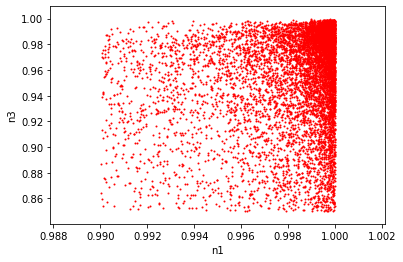

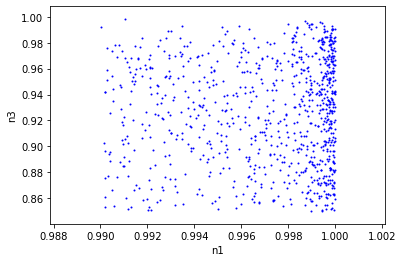

In [5]:
secs_per_year = 31536000
years = 10
weight_name = 'weight_val_0'
wtype = 'nom'
sig_df, bkg_df = MakeDataFrames(data_tc,data_tn,data_mc,data_mn,data_ec,data_en,data_eg,data_c, weight_name=weight_name, wtype=wtype,\
                                       path = dataframe_path, save= True, livetime = secs_per_year*years)
sig_df.plot(kind='scatter', x='n1', y='n3', s=1, c='r')
bkg_df.plot(kind='scatter', x='n1', y='n3', s=1, c='b')

In [16]:
sig_exp, bkg_exp = np.sum(sig_df['weight']), np.sum(bkg_df['weight'])
print(sig_exp, bkg_exp)
bins_x, bins_y = get_default_binning()
   
sig, bkg, xe, ye = build_histograms(
    sig_df, bkg_df, bins_x, bins_y,
    weight_col='weight') 

6.834409440215108 0.3287895779313087


/home/dup193/work/double_pulse/stat_analysis/helper_functions.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


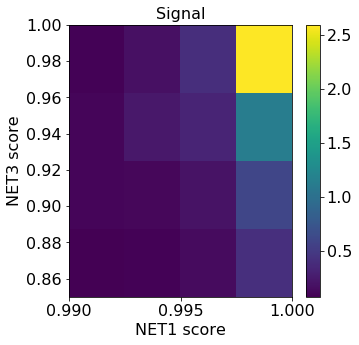

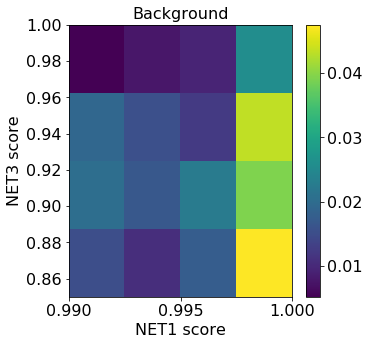

In [7]:
plot_histogram(sig.T,xe,ye,'Signal',1)
plot_histogram(bkg.T,xe,ye,'Background',1)

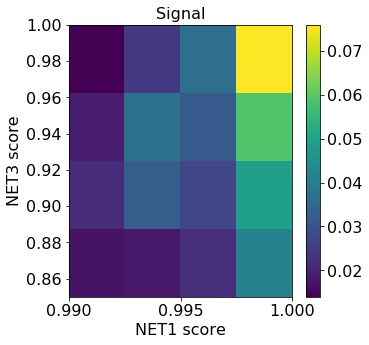

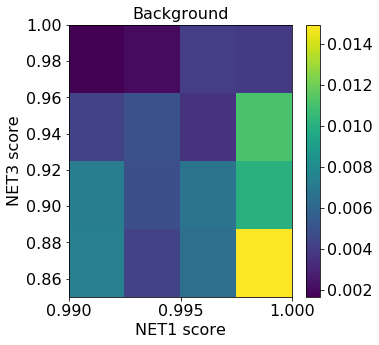

In [13]:
Hs,Hb, _, _ = build_uncert_histograms(sig_df,bkg_df,xe,ye)
plot_histogram(Hs.T,xe,ye,'Signal',1)
plot_histogram(Hb.T,xe,ye,'Background',1)

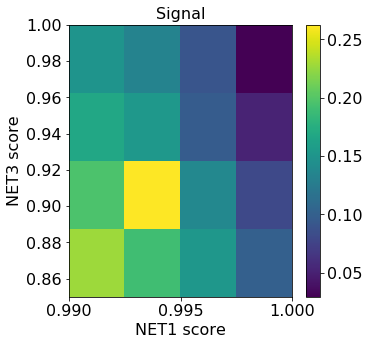

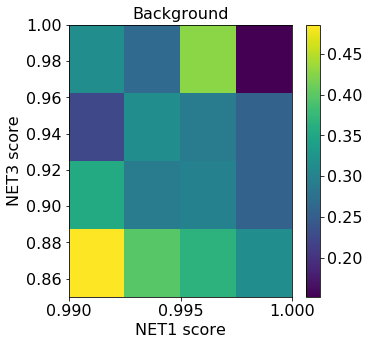

In [15]:
plot_histogram_ratio(sig.T,Hs.T,xe,ye,'Signal')
plot_histogram_ratio(bkg.T,Hb.T,xe,ye,'Background')

In [19]:
n_jobs=100
n_samples=100000
mu_bins = np.linspace(0, 25, 1001)
ts_bins = np.linspace(0, 200, 2001)

In [20]:
def main(n_jobs, n_samples, sig_df, bkg_df, sig_exp, bkg_exp,out_path):
    global mu_bins,ts_bins
    
    ts_bins = ts_bins - np.diff(ts_bins)[0] / 2.
    n_samples_per_mu = n_samples
    #out_path ="/home/dup193/work/double_pulse/max_test/munormm/ts_dist/"
    if not os.path.isdir(out_path):
        os.makedirs(out_path)
    hists, ts_e = scan_neyman_plane(
        sig, bkg, bkg_exp,
        mu_bins, ts_bins, n_samples_per_mu,
        n_jobs=n_jobs, save=True,
        out_path=out_path)


if __name__ == '__main__':
    main(n_jobs,n_samples,sig_df, bkg_df, sig_exp, bkg_exp,out_path)

In [22]:
def fill_hist(name_out):
    hists = np.zeros((len(mu_bins), len(ts_bins) - 1))
    for file_name in glob(name_out+'*'):
        sp = re.split('_|\.|/',file_name)
        mu = float(sp[-3]+"."+sp[-2])
        i = np.where(mu_bins==mu)
        x = np.load(file_name, mmap_mode="r")['arr_0']
        hist, ts_e = np.histogram(x, bins=ts_bins)
        hist = hist / float(np.sum(hist))
        hists[i] = hist
    return hists

In [23]:
#name_out1 = "/home/dup193/work/double_pulse/max_test/ts_dist/"
#name_out2 = "/home/dup193/work/double_pulse/max_test/ts_dist_2/"
#name_out3 = "/home/dup193/work/double_pulse/max_test/ts_dist_3/"
#name_out1 = "/home/dup193/work/double_pulse/max_test/ts_dist/"
name_out1 ="/home/dup193/work/double_pulse/max_test/munormm/ts_dist_merge_test/"
#name_out2 = "/home/dup193/work/double_pulse/max_test/nl/ts_dist/"
#name_out3 = "/home/dup193/work/double_pulse/max_test/nu/ts_dist/"
hists1 = fill_hist(name_out1)
#hists2 = fill_hist(name_out2)
#hists3 = fill_hist(name_out3)

In [24]:
print(sum(hists1))
#print(sum(hists2))
#print(sum(hists3))

#print(mat.shape)

[244.43802 166.68428 104.98391 ...   0.        0.        0.     ]


In [25]:
def plot_ts(hists):
    vmin = np.min([np.min(hist) for hist in hists])
    vmax = np.max([np.max(hist) for hist in hists])
    fig = plt.figure(figsize=(10, 10),facecolor ='w')
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax = fig.add_subplot()
    ax.set_xlim(0,25)
    for i in range(len(mu_bins) - 1):
        Xe, Ye = np.meshgrid(ts_bins, [mu_bins[i], mu_bins[i+1]])
        im = ax.pcolormesh(Xe, Ye, np.atleast_2d(hists[i]), vmin=vmin+1e-4, vmax=vmax, norm=LogNorm())
    plt.colorbar(im)
    ax.set_xlabel('TS: $-\log(\mathcal{L}(\mu_t) / \mathcal{L}(\hat{\mu}))$')
    ax.set_ylabel(r'Mean signal expectation $\mu_t$')
    # plt.savefig('plots/neyman_plane_hans.pdf', bbox_inches='tight')
    #ax.imshow(hists,origin='lower',interpolation='none', extent=[0,20,0,20])

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


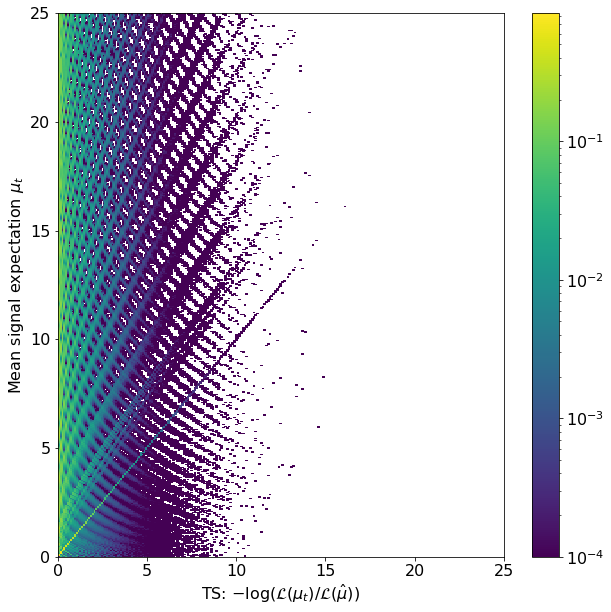

In [26]:
plot_ts(hists1)
#plot_ts(hists2)
#plot_ts(hists3)

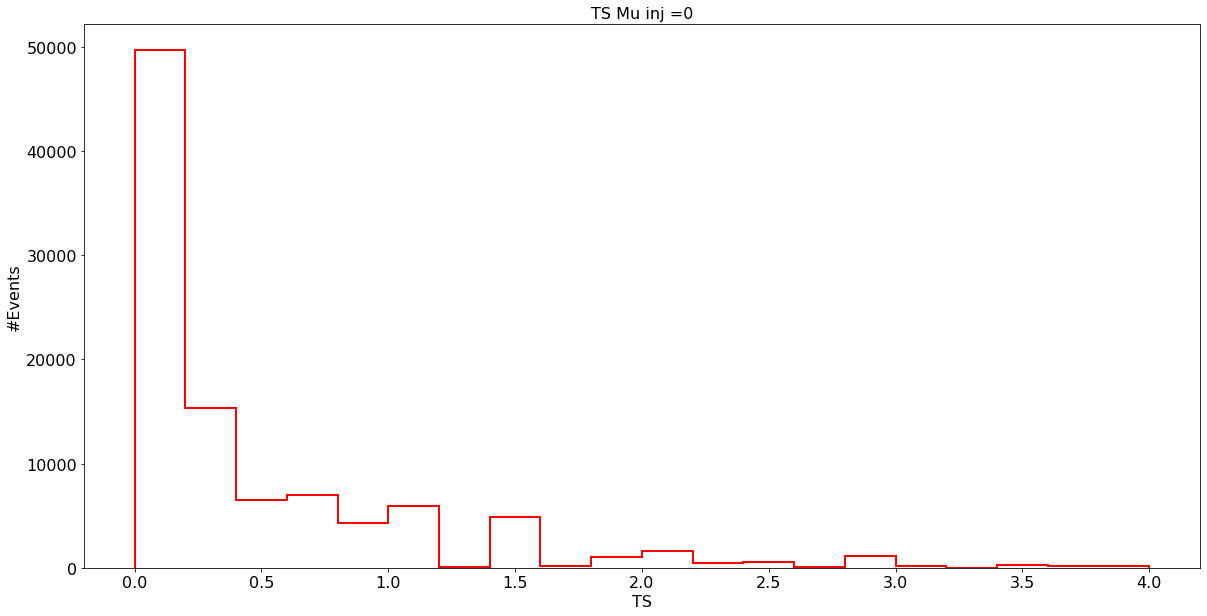

In [27]:
from glob import glob
import re 
file_name = "/home/dup193/work/double_pulse/max_test/ts_dist/ts_mu_13.65.npz"
x = np.load(file_name, mmap_mode="r")['arr_0']
fig = plt.figure(figsize=(20, 10),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("TS Mu inj =0", fontsize = 16)
ax.set_xlabel("TS", fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(x, bins = 20, histtype = 'step',edgecolor ='r', lw =2, range =[0,4], label = "NuTauCC")  
#plt.legend(loc=loc)
plt.show()


In [29]:
lc_1 = LimitCalculator(
    'baseline', flux_systematic=True,
     scan_path="/home/dup193/work/double_pulse/max_test/munormm/ts_dist_merge_test/",
     df_path='/home/dup193/work/double_pulse/max_test/dataframes/fr1/',
     livetime=1)

In [30]:
lc_2 = LimitCalculator(
    'baseline', flux_systematic=True,
     df_path='/home/dup193/work/double_pulse/max_test/dataframes/su/',
     scan_path='/home/dup193/work/double_pulse/max_test/su/ts_dist/',
     livetime=1)

In [31]:
lc_3 = LimitCalculator(
    'baseline', flux_systematic=True,
     df_path='/home/dup193/work/double_pulse/max_test/dataframes/sl/',
     scan_path='/home/dup193/work/double_pulse/max_test/sl/ts_dist/',   
     livetime=1)

In [785]:
#lc_4 = LimitCalculator(
#    'baseline', flux_systematic=True,
#     df_path='/home/dup193/work/double_pulse/max_test/dataframes/p2m3/',
#     scan_path='/home/dup193/work/double_pulse/max_test/p2m3/ts_dist/',   
#     livetime=1)

In [32]:
likelihood = BinnedPoissonLikelihood(lc_1.sig, lc_1.bkg, lc_1.random_state)
#likelihood = BinnedPoissonLikelihood(lc_2.sig, lc_2.bkg, lc_2.random_state)
#likelihood = BinnedPoissonLikelihood(lc_3.sig, lc_3.bkg, lc_3.random_state)
#likelihood = BinnedPoissonLikelihood(lc_4.sig, lc_4.bkg, lc_4.random_state)
lc_1.set_likelihood(likelihood)
lc_2.set_likelihood(likelihood)
lc_3.set_likelihood(likelihood)
#lc_4.set_likelihood(likelihood)

In [33]:
tss_1 = lc_1.__load_acceptance_values__(return_ts=True)
tss_2 = lc_2.__load_acceptance_values__(return_ts=True)
tss_3 = lc_3.__load_acceptance_values__(return_ts=True)
#tss_4 = lc_4.__load_acceptance_values__(return_ts=True)

In [34]:
mus = lc_1.mus

In [35]:
def load_ts(tss):
    ts_bins = np.linspace(0, 200, 2001)
    ts_bins = ts_bins - np.diff(ts_bins)[0] / 2.
    hists = []
    for i in range(len(mus)):
        hist_i, edges = np.histogram(tss[i], bins=ts_bins, density=False)
        hist_i = hist_i / float(np.sum(hist_i))
        hists.append(hist_i)
    return hists

In [36]:
ts1_hist = load_ts(tss_1)
ts2_hist = load_ts(tss_2)
ts3_hist = load_ts(tss_3)
ts4_hist = load_ts(tss_3)

Text(0.5, 0, 'TS')

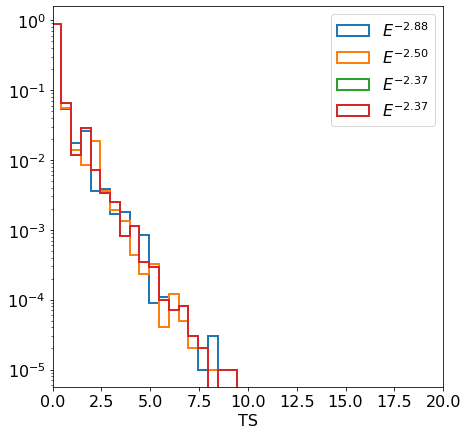

In [37]:
fig = plt.figure(figsize=(7, 7),facecolor ='w')
ts_center = (ts_bins[1:] + ts_bins[:-1]) / 2.
plt.hist(ts_center, bins=ts_bins[::5],
         weights=ts1_hist[0],
         histtype='step', lw=2,
         label='$E^{-2.88}$')
plt.hist(ts_center, bins=ts_bins[::5],
         weights=ts2_hist[0],
         histtype='step', lw=2,
         label='$E^{-2.50}$')
plt.hist(ts_center, bins=ts_bins[::5],
         weights=ts3_hist[0],
         histtype='step', lw=2,
         label='$E^{-2.37}$')
plt.hist(ts_center, bins=ts_bins[::5],
         weights=ts4_hist[0],
         histtype='step', lw=2,
         label='$E^{-2.37}$')
plt.yscale('log')
plt.xlim(0, 20)
plt.legend()
plt.xlabel('TS')

1001 [0.60041721 0.53712633 0.47839694 0.53346979 0.60174108 0.83818816
 0.7413658  0.65778553 0.58484869 0.52065369 0.46376702 0.53752212
 0.54264322 0.64567334 0.67134647 0.68505145 0.71795801 0.70752237
 0.67779112 0.6378212  0.69312254 0.71086704 0.67002861 0.65639414
 0.7006991  0.661093   0.65       0.675      0.7        0.725
 0.75       0.775      0.8        0.825      0.85       0.875
 0.9        0.925      0.95       0.975      1.         1.025
 1.05       1.075      1.1        1.125      1.15       1.175
 1.2        1.225      1.25       1.275      1.3        1.325
 1.35       1.375      1.4        1.425      1.45       1.475
 1.5        1.525      1.55       1.575      1.6        1.625
 1.65       1.675      1.7        1.725      1.75       1.775
 1.8        1.825      1.85       1.875      1.9        1.925
 1.95       1.975      2.         2.025      2.05       2.075
 2.1        2.125      2.0118292  1.93281655 1.84567248 1.80948285
 1.79030556 1.70902105 1.6649997  1.6228

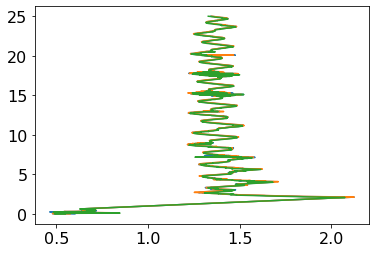

In [38]:
plt.plot(lc_1.acc_vals, mus)
plt.plot(lc_2.acc_vals, mus)
plt.plot(lc_3.acc_vals, mus)
#plt.plot(lc_4.acc_vals, mus)
print(len(lc_1.acc_vals),lc_1.acc_vals[:100])

7.5


Text(0.5, 0, 'TS')

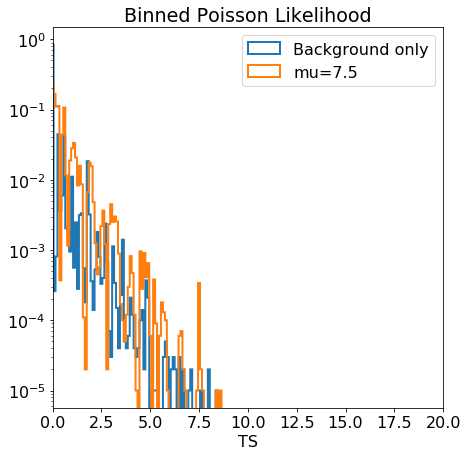

In [39]:
fig = plt.figure(figsize=(7, 7),facecolor ='w')
ts_center = (ts_bins[1:] + ts_bins[:-1]) / 2.
plt.title('Binned Poisson Likelihood')
print(mus[300])
plt.hist(ts_center, bins=ts_bins,
         weights=ts1_hist[0],
         histtype='step', lw=2,
         label='Background only')
plt.hist(ts_center, bins=ts_bins,
         weights=ts1_hist[300],
         histtype='step', lw=2,
         label='mu=7.5')
plt.yscale('log')
plt.xlim(0, 20)
plt.legend()
plt.xlabel('TS')

No handles with labels found to put in legend.


Text(0.5, 0, 'TS')

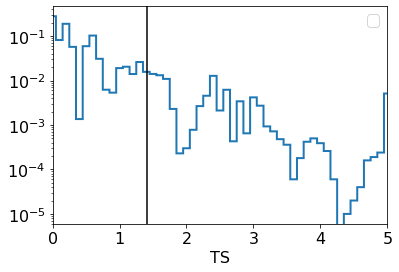

In [40]:
idx = 200
plt.hist(ts_center, bins=ts_bins,
         weights=ts1_hist[idx],
         histtype='step', lw=2)
plt.axvline(lc_1.acc_vals[idx], color='k')
plt.yscale('log')
plt.xlim(0, 5)
plt.legend()
plt.xlabel('TS')

In [41]:
samples_bkg_1 = lc_1.create_samples()
samples_bkg_2 = lc_2.create_samples()
samples_bkg_3 = lc_3.create_samples()
#samples_bkg_4 = lc_4.create_samples()

In [42]:
lmds = np.linspace(0, 30, 301)

llh_vals = []
for lmdi in lmds:
    llh_val = likelihood.log_likelihood(lmdi, samples_bkg[7])
    llh_vals.append(llh_val)

ts_vals = []
for lmdi in lmds:
    _, lmd = likelihood.fit_lmd_best(lmdi, samples_bkg[7])
    ts_val = likelihood.test_statistic_best(
        lmd, lmdi, samples_bkg[7])
    ts_vals.append(-ts_val)

NameError: name 'samples_bkg' is not defined

In [ ]:
plt.plot(lmds, llh_vals)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$-\log \mathcal{L}$');

In [ ]:
plt.plot(lmds, ts_vals)
plt.title(r'$\Lambda(\lambda) = - \log \left(\frac{\mathcal{L}(\hat{\lambda})}{\mathcal{L}(\lambda)} \right)$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\Lambda$');

In [43]:
def find_int_trials(samples):
    print(samples.shape)
    ss = np.sum(samples, axis =(1,2))
    print('max',np.max(ss),np.argmax(ss))
    print('min',np.min(ss),np.argmin(ss))
    return np.argmax(ss), np.argmin(ss)

In [44]:
maxt1, mint1 = find_int_trials(samples_bkg_1)
maxt2, mint2 = find_int_trials(samples_bkg_2)
maxt3, mint3 = find_int_trials(samples_bkg_3)
#maxt4, mint4 = find_int_trials(samples_bkg_4)

(1000, 4, 4)
max 4 928
min 0 0
(1000, 4, 4)
max 4 941
min 0 0
(1000, 4, 4)
max 4 895
min 0 0


In [45]:
(samples_bkg_2==samples_bkg_3).all()

False

In [46]:
def plot_ts_acval(limit_calculator,hists,samples_bkg,n1,n2):
    fig = plt.figure(figsize=(10, 10),facecolor ='w')
    vmin = np.min([np.min(hist) for hist in hists])
    vmax = np.max([np.max(hist) for hist in hists])

    ts_vals = []
    for mu in mus:
        lmd = mu / limit_calculator.sig_exp
        ts_val, lmd = likelihood.fit_lmd_best(lmd, samples_bkg[n1])
        ts_vals.append(-ts_val)
    
    ts_vals2 = []
    for mu in mus:
        lmd = mu / limit_calculator.sig_exp
        ts_val, lmd = likelihood.fit_lmd_best(lmd, samples_bkg[n2])
        ts_vals2.append(-ts_val)

    fig, ax = plt.subplots(figsize=(10, 10),facecolor ='w')
    for i in range(len(mus) - 1):
        Xe, Ye = np.meshgrid(ts_bins, [mus[i], mus[i+1]])
        im = ax.pcolormesh(Xe, Ye, np.atleast_2d(hists[i]), norm=LogNorm())# , vmin=vmin+1e-4, vmax=vmax
    plt.plot(ts_vals, mus, color='k', label='Scan for example experiment')
    plt.plot(ts_vals2, mus, color='k', ls='--', label='Scan for example experiment')
    plt.plot(limit_calculator.acc_vals, mus, color='r', label='Critical values')
    ax.set_xlabel('TS: $-\log(\mathcal{L}(\mu_t) / \mathcal{L}(\hat{\mu}))$')
    ax.set_ylabel(r'Mean signal expectation $\mu_t$')
    plt.xlim(0, 8)
    ylim_lower = 0
    ylim_upper = 8
    plt.ylim(ylim_lower, ylim_upper)
    plt.legend(loc =1)
    ax2 = ax.twinx()
    ax2.set_ylabel(r'Mean rel. $\nu_{\tau}$ flux norm $\lambda_t$')
    ax2.plot(ts_vals2, mus/limit_calculator.sig_exp, color='k', ls='--', label='Scan for example experiment')
    ax2.set_ylim(ylim_lower/limit_calculator.sig_exp, ylim_upper/limit_calculator.sig_exp)
    plt.colorbar(im, pad=0.15)

<Figure size 720x720 with 0 Axes>

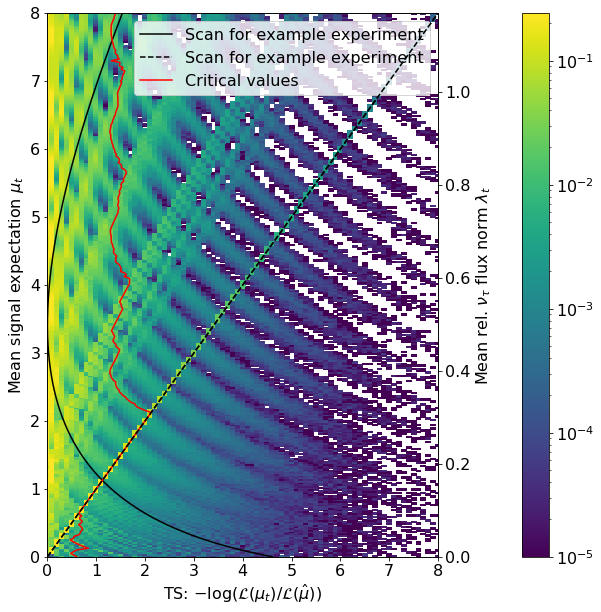

In [47]:
plot_ts_acval(lc_1,ts1_hist,samples_bkg_1,maxt1, mint1)

<Figure size 720x720 with 0 Axes>

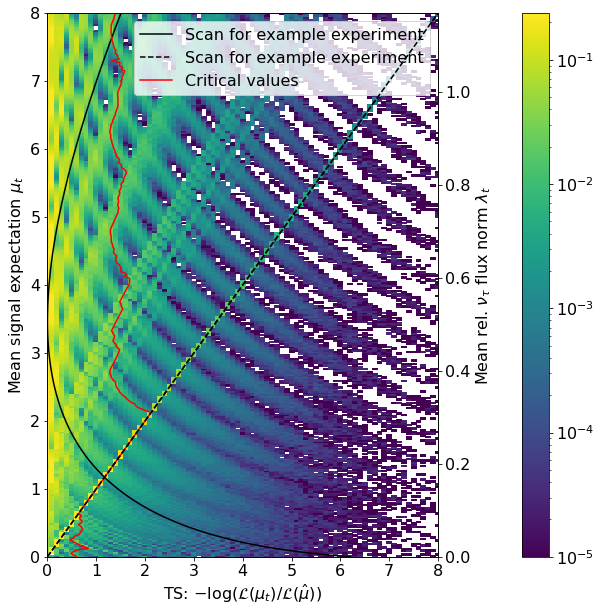

In [48]:
plot_ts_acval(lc_1,ts2_hist,samples_bkg_2,maxt2, mint2)

<Figure size 720x720 with 0 Axes>

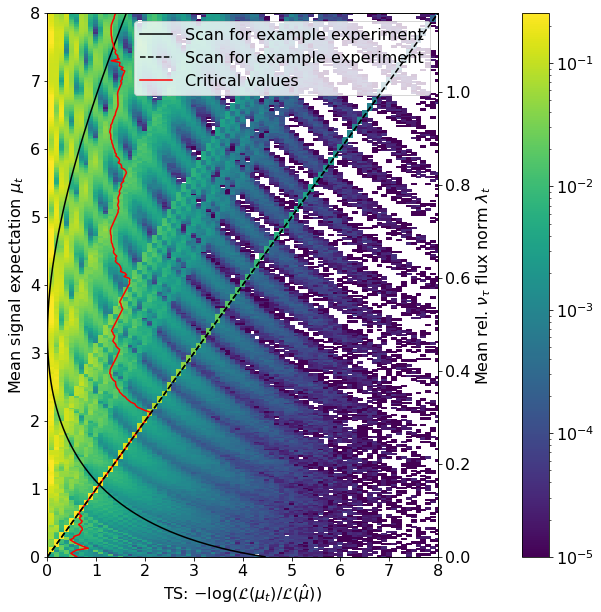

In [49]:
plot_ts_acval(lc_1,ts3_hist,samples_bkg_3,maxt3, mint3)

<Figure size 720x720 with 0 Axes>

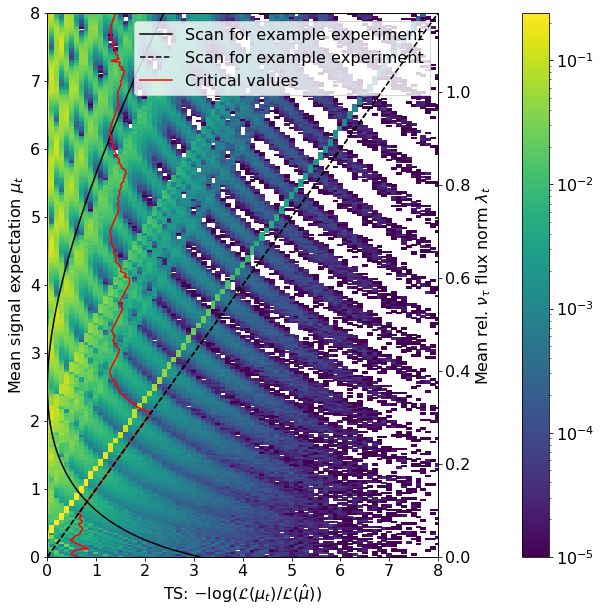

In [909]:
plot_ts_acval(lc_1,ts4_hist,samples_bkg_4,maxt4, mint4)

In [50]:
flux_norm = 2.12
#flux_norm = 2.61
#flux_norm = 1.58

#flux_norm = 2.23
#flux_norm = 1.36


lc_1.calculate_limits(lc_1.acc_vals, flux_norm)
lc_2.calculate_limits(lc_1.acc_vals, flux_norm)
lc_3.calculate_limits(lc_1.acc_vals, flux_norm)
#lc_4.calculate_limits(lc_4.acc_vals, flux_norm)

100%|██████████| 1000/1000 [00:21<00:00, 46.56it/s]


In [51]:
print(lc_1.average_upper_limit,lc_1.average_upper_limit/flux_norm)
print(np.std(lc_1.upper_limits_flux))

0.719140701620784 0.33921731208527545
0.23890371930581897


In [52]:
print(lc_2.average_upper_limit,lc_2.average_upper_limit/flux_norm)
print(np.std(lc_2.upper_limits_flux))

0.7110368558555447 0.3353947433280871
0.23139910079161902


In [53]:
print(lc_3.average_upper_limit,lc_3.average_upper_limit/flux_norm)
print(np.std(lc_3.upper_limits_flux),np.max(lc_3.upper_limits_flux))

0.7416143332262043 0.3498180817104737
0.2644147393890846 2.326462899111817


In [870]:
print(lc_4.average_upper_limit,lc_4.average_upper_limit/flux_norm)
print(np.std(lc_4.upper_limits_flux),np.max(lc_4.upper_limits_flux))

0.7346812300364934 0.3465477500172139
0.25526519616873566 2.0113473649711526


In [54]:
#upper_lims = np.concatenate((lc_1.upper_limits_flux,lc_2.upper_limits_flux,lc_3.upper_limits_flux,lc_4.upper_limits_flux), axis =0)
upper_lims = np.concatenate((lc_1.upper_limits_flux,lc_2.upper_limits_flux,lc_3.upper_limits_flux), axis =0)

#upper_lims = np.concatenate((lc_1.upper_limits_flux,lc_2.upper_limits_flux), axis =0)
print(np.mean(upper_lims),np.max(upper_lims))

0.7239306302341775 2.365237280763681


In [55]:
print(np.sum(lc_1.lower_limits_flux==0)/len(lc_1.lower_limits_flux))
print(np.sum(lc_2.lower_limits_flux==0)/len(lc_2.lower_limits_flux))
print(np.sum(lc_3.lower_limits_flux==0)/len(lc_3.lower_limits_flux))
#print(np.sum(lc_4.lower_limits_flux==0)/len(lc_4.lower_limits_flux))

0.91
0.919
0.88


Text(0.5, 1.0, 'Fitting with P2=-3 $E^{-2.87}$')

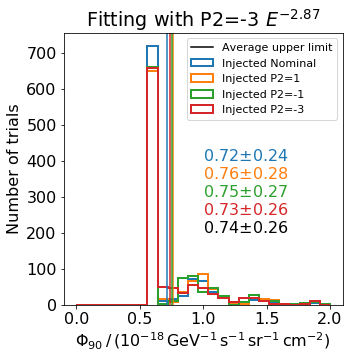

In [873]:
ul_bins = np.linspace(0, 2, 26)
fig = plt.figure(figsize=(5, 5),facecolor ='w')

plt.hist(lc_1.upper_limits_flux, bins=ul_bins, histtype='step', lw=2, label='Injected Nominal')
plt.hist(lc_2.upper_limits_flux, bins=ul_bins, histtype='step', lw=2, label='Injected P2=1')
plt.hist(lc_3.upper_limits_flux, bins=ul_bins, histtype='step', lw=2, label='Injected P2=-1')
plt.hist(lc_4.upper_limits_flux, bins=ul_bins, histtype='step', lw=2, label='Injected P2=-3')

plt.axvline(lc_1.average_upper_limit)
plt.axvline(lc_2.average_upper_limit, color = 'C1')
plt.axvline(lc_3.average_upper_limit, color = 'C2')
plt.axvline(lc_4.average_upper_limit, color = 'C3')

plt.text(1,400, "{0:.2f}$\pm${1:.2f}".format(lc_1.average_upper_limit,np.std(lc_1.upper_limits_flux)), color = 'C0')
plt.text(1,350, "{0:.2f}$\pm${1:.2f}".format(lc_2.average_upper_limit,np.std(lc_2.upper_limits_flux)), color = 'C1')
plt.text(1,300, "{0:.2f}$\pm${1:.2f}".format(lc_3.average_upper_limit,np.std(lc_3.upper_limits_flux)), color = 'C2')
plt.text(1,250, "{0:.2f}$\pm${1:.2f}".format(lc_4.average_upper_limit,np.std(lc_4.upper_limits_flux)), color = 'C3')

plt.text(1,200, "{0:.2f}$\pm${1:.2f}".format(np.mean(upper_lims),np.std(upper_lims)), color = 'k')

plt.plot([], [], color='k', ls='-', label='Average upper limit')
plt.legend(fontsize = 'x-small')
plt.xlabel('$\Phi_{90} \,/ \, (10^{-18} \, \mathrm{GeV}^{-1} \, \mathrm{s}^{-1} \, \mathrm{sr}^{-1} \, \mathrm{cm}^{-2})$')
plt.ylabel('Number of trials')
plt.title('Fitting with P2=-3 $E^{-2.87}$')

Text(0.5, 1.0, 'Fitting with $E^{-3.08}$')

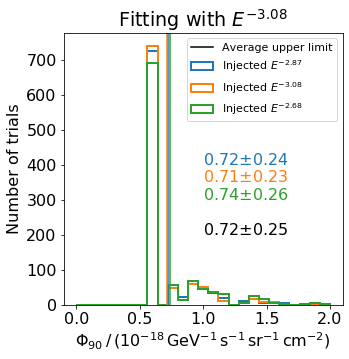

In [56]:
ul_bins = np.linspace(0, 2, 26)
fig = plt.figure(figsize=(5, 5),facecolor ='w')

plt.hist(lc_1.upper_limits_flux, bins=ul_bins, histtype='step', lw=2, label='Injected $E^{-2.87}$')
plt.hist(lc_2.upper_limits_flux, bins=ul_bins, histtype='step', lw=2, label='Injected $E^{-3.08}$')
plt.hist(lc_3.upper_limits_flux, bins=ul_bins, histtype='step', lw=2, label='Injected $E^{-2.68}$')

plt.axvline(lc_1.average_upper_limit)
plt.axvline(lc_2.average_upper_limit, color = 'C1')
plt.axvline(lc_3.average_upper_limit, color = 'C2')

plt.text(1,400, "{0:.2f}$\pm${1:.2f}".format(lc_1.average_upper_limit,np.std(lc_1.upper_limits_flux)), color = 'C0')
plt.text(1,350, "{0:.2f}$\pm${1:.2f}".format(lc_2.average_upper_limit,np.std(lc_2.upper_limits_flux)), color = 'C1')
plt.text(1,300, "{0:.2f}$\pm${1:.2f}".format(lc_3.average_upper_limit,np.std(lc_3.upper_limits_flux)), color = 'C2')
plt.text(1,200, "{0:.2f}$\pm${1:.2f}".format(np.mean(upper_lims),np.std(upper_lims)), color = 'k')

plt.plot([], [], color='k', ls='-', label='Average upper limit')
plt.legend(fontsize = 'x-small')
plt.xlabel('$\Phi_{90} \,/ \, (10^{-18} \, \mathrm{GeV}^{-1} \, \mathrm{s}^{-1} \, \mathrm{sr}^{-1} \, \mathrm{cm}^{-2})$')
plt.ylabel('Number of trials')
plt.title('Fitting with $E^{-3.08}$')